In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Team, D. (2018, May 8). Long to wide data in R. https://www.datacamp.com/tutorial/long-wide-data-R
# create data frame
data = {
    'Wellbeing Measure': [
        'Feeling useful', 
        'Feeling cheerful', 
        'Feeling relaxed', 
        'Feeling close to others', 
        'Feeling confident', 
        'Thinking clearly',
        'Dealing with problems well',
        'Feeling good about self',
        'Feeling loved',
        'Interested in new things'
    ],
    'D5': [1.00, 2.00, 0.00, 1.00, 2.00, 0.00, 2.00, 1.00, 2.00, 0.00],
    'D16': [0.00, 1.00, 1.00, 2.00, 2.00, 1.00, 2.00, 1.00, 2.00, 1.00],
    'D2': [0.00, 2.00, 1.00, 1.00, 1.00, 1.00, 2.00, 0.00, 2.00, 0.00],
    'C6': [0.00, 1.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    'C14': [-1.00, 0.00, -1.00, 0.00, 0.00, -1.00, -1.00, -1.00, 0.00, -1.00],
    'C12': [0.00, 1.00, 1.00, 1.00, 0.00, 1.00, 0.00, 1.00, 1.00, 0.00]
}

# convert data to df
df_wide = pd.DataFrame(data)

# melt to long format
df_long = df_wide.melt(id_vars='Wellbeing Measure', var_name='Participant', value_name='Score')

#  group labels
df_long['Group'] = df_long['Participant'].apply(lambda x: 'Detox' if x in ['D5', 'D16', 'D2'] else 'Control')

df_long

,Wellbeing Measure,Participant,Score,Group
0,Feeling useful,D5,1.0,Detox
1,Feeling cheerful,D5,2.0,Detox
2,Feeling relaxed,D5,0.0,Detox
3,Feeling close to others,D5,1.0,Detox
4,Feeling confident,D5,2.0,Detox
5,Thinking clearly,D5,0.0,Detox
6,Dealing with problems well,D5,2.0,Detox
7,Feeling good about self,D5,1.0,Detox
8,Feeling loved,D5,2.0,Detox
9,Interested in new things,D5,0.0,Detox


In [9]:
How to pivot a dataframe in Pandas? (n.d.). Stack Overflow. https://stackoverflow.com/questions/28337117/how-to-pivot-a-dataframe-in-pandas
# pivot to allocate score to participants
df_pivot = df_long.pivot(index='Wellbeing Measure', columns='Participant', values='Score')

In [10]:
# calculate average score per participant
DataCamp. (n.d.). NumPy mean(). https://www.datacamp.com/doc/numpy/mean
mean_scores = df_pivot.mean(axis=0).reset_index()
mean_scores.columns = ['Participant', 'Mean_Score']

# Categorize data in given group labels. (n.d.). Stack Overflow. https://stackoverflow.com/questions/67778967/categorize-data-in-given-group-labels
# give group labels
mean_scores['Group'] = mean_scores['Participant'].apply(lambda x: 'Detox' if x in ['D5', 'D16', 'D2'] else 'Control')

In [11]:
# Awan, A. A. (2023, March 14). T-tests in R Tutorial: Learn how to conduct T-Tests. https://www.datacamp.com/tutorial/t-tests-r-tutorial
# t test
from scipy.stats import ttest_ind

detox_scores = mean_scores[mean_scores['Group'] == 'Detox']['Mean_Score']
control_scores = mean_scores[mean_scores['Group'] == 'Control']['Mean_Score']

t_stat, p_val = ttest_ind(detox_scores, control_scores, equal_var=False)

print(f"Overall t-statistic: {t_stat:.3f}")
print(f"Overall p-value: {p_val:.4f}")

Overall t-statistic: 2.784
Overall p-value: 0.0957


The overall t-test showed a trend toward higher wellbeing in the Detox group (t = 2.784, p = 0.096), though it wasn’t statistically significant at the 0.05 level. 

In [13]:
# https://campus.datacamp.com/courses/performing-experiments-in-python/sample-size-power-analysis-and-effect-size?ex=9
# cohen d test
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std(ddof=1)**2 + (ny - 1)*y.std(ddof=1)**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

overall_d = cohen_d(detox_scores, control_scores)
print(f"Overall Cohen's d: {overall_d:.3f}")

Overall Cohen's d: 2.273


The difference in mean wellbeing between the Detox and Control groups is more than 2 standard deviations — that’s very substantial in practical terms.

/tmp/ipykernel_154/4001514473.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=mean_scores, x='Group', y='Mean_Score', ci='sd')  # or ci='se'


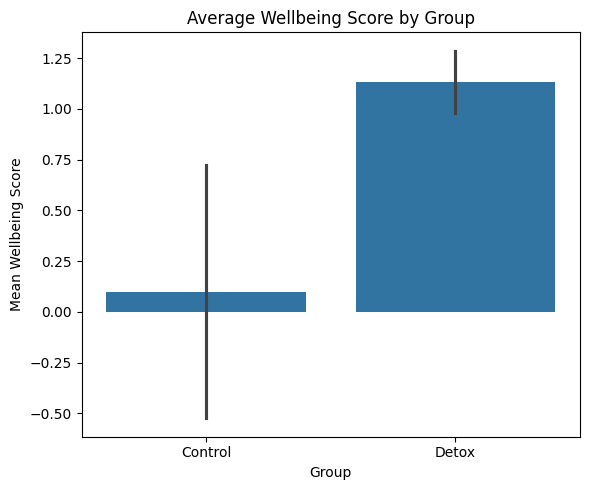

In [17]:
# https://www.datacamp.com/tutorial/seaborn-barplot
# barplot of mean scores per group
plt.figure(figsize=(6, 5))
sns.barplot(data=mean_scores, x='Group', y='Mean_Score', ci='sd')  # or ci='se'
plt.title('Average Wellbeing Score by Group')
plt.ylabel('Mean Wellbeing Score')
plt.xlabel('Group')
plt.tight_layout()
plt.show()